In [235]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from urllib.parse import urlparse

In [236]:
# Import data
data = pd.read_json('data.json', lines = True)
emotions_df = pd.read_csv('emotions_df.csv')
news_predicted_topics = np.load('news_predicted_topics.npy')

In [238]:
# Concatenate all the data into one dataframe
dtf = pd.concat([data, emotions_df], axis=1)
dtf['pred_topic'] = pd.DataFrame(news_predicted_topics)

In [239]:
dtf.columns

Index(['subreddit', 'id', 'title', 'score', 'upvote_ratio', 'url', 'comment_1',
       'comment_2', 'comment_3', 'score_c1', 'score_c2', 'score_c3',
       'enc_emote_c1', 'enc_emote_c2', 'enc_emote_c3', 'emote_c1', 'emote_c2',
       'emote_c3', 'pred_topic'],
      dtype='object')

In [240]:
# Prepare data for the topic-emotion pie plots
emot_react_df = dtf[['pred_topic','emote_c1','emote_c2','emote_c3']]
emot_react_df

,pred_topic,emote_c1,emote_c2,emote_c3
0,CRIMES,anger,anger,anger
1,HEALTH,anger,sadness,anger
2,POLITICS,fear,joy,sadness
3,CRIMES,joy,anger,joy
4,HEALTH,anger,anger,anger
...,...,...,...,...
9897,HEALTH,anger,joy,joy
9898,HEALTH,anger,sadness,joy
9899,POLITICS,joy,anger,joy
9900,CRIMES,joy,anger,anger


In [241]:
# Prepare data for the topic-emotion pie plots
emote_lst =['anger', 'joy', 'fear', 'love', 'surprise', 'sadness']
comment_lst = ['emote_c1', 'emote_c2', 'emote_c3']

pie_data = pd.DataFrame(np.zeros((4, 6)))
pie_data = pie_data.rename(columns={0: "anger", 1: "joy", 2: "fear", 3: "love", 4: "surprise", 5: "sadness",})
pie_data = pie_data.rename(index={0: "CRIMES", 1: "ECONOMY", 2: "HEALTH", 3: "POLITICS"})

for emotion in emote_lst:
    for comments in comment_lst:
        
        x = emot_react_df.groupby(['pred_topic'])[comments].apply(lambda x: x[x.str.contains(emotion)].count())
        y = pie_data[emotion].to_numpy()
        pie_data[emotion] = (x.to_numpy() + y).tolist()

In [242]:
pie_data

,anger,joy,fear,love,surprise,sadness
CRIMES,4321.0,2618.0,591.0,113.0,121.0,858.0
ECONOMY,2216.0,1610.0,238.0,58.0,65.0,454.0
HEALTH,5308.0,3756.0,655.0,142.0,188.0,1129.0
POLITICS,2572.0,1722.0,280.0,64.0,90.0,537.0


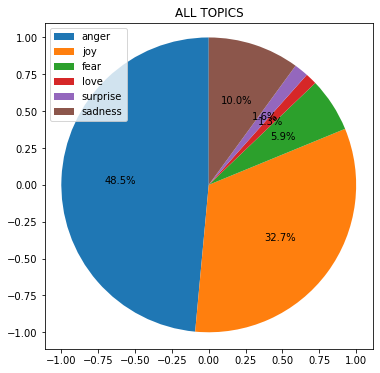

In [243]:
# All_topics-emotion pie plot
plt.figure(figsize=(6, 6))
plt.pie(pie_data.sum(axis=0).tolist(), labels=emote_lst, startangle=90, frame=True, labeldistance=None, autopct='%1.1f%%')
plt.title('ALL TOPICS')
plt.legend()
plt.show()

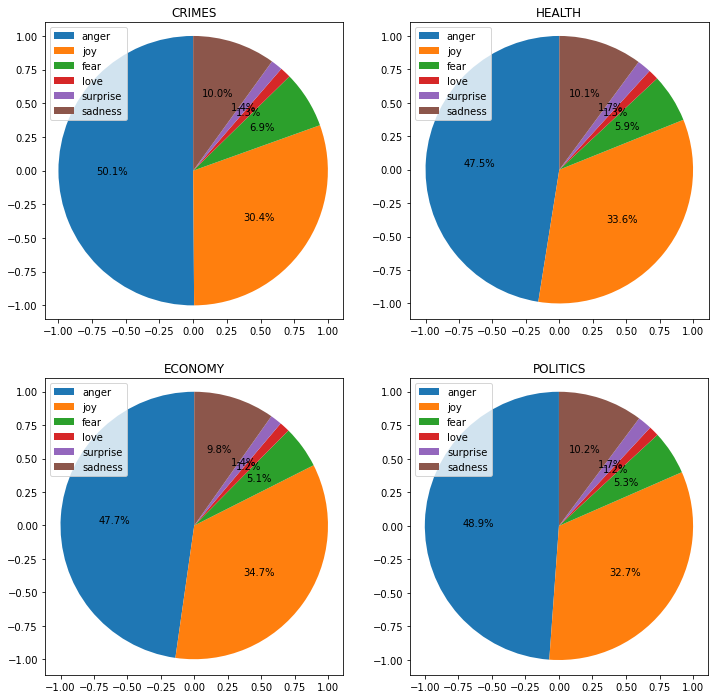

In [244]:
# Topic-emotion pie plots
topic_lst = ['CRIMES', 'ECONOMY', 'HEALTH', 'POLITICS']

figure, axis = plt.subplots(2, 2, figsize=(12,12))

for i, topic in enumerate(topic_lst):
    
    data = pie_data.loc[topic].tolist()

    axis[i % 2, i // 2].pie(data, labels=emote_lst, startangle=90, frame=True, labeldistance=None, autopct='%1.1f%%')
    axis[i % 2, i // 2].title.set_text(topic)
    axis[i % 2, i // 2].legend()

plt.show() 

In [245]:
# Prepare data for the url-emotion pie plots
url_react_df = dtf[['url','emote_c1','emote_c2','emote_c3']]
url_react_df

,url,emote_c1,emote_c2,emote_c3
0,https://www.buzzfeednews.com/article/clarissaj...,anger,anger,anger
1,https://www.cbr.com/us-military-lose-space-for...,anger,sadness,anger
2,https://americanindependent.com/white-house-th...,fear,joy,sadness
3,https://www.cityam.com/metas-threat-to-close-d...,joy,anger,joy
4,https://www.cnn.com/world/live-news/coronaviru...,anger,anger,anger
...,...,...,...,...
9897,https://www.reuters.com/world/asia-pacific/bat...,anger,joy,joy
9898,https://text.npr.org/1036678722,anger,sadness,joy
9899,https://www.cbsnews.com/news/durham-report-pro...,joy,anger,joy
9900,https://www.forbes.com/sites/siladityaray/2021...,joy,anger,anger


In [246]:
# Get urls without unnecessary sruff
url_react_df['url_clear'] = url_react_df['url'].apply(lambda x: urlparse(str(x)).hostname)
url_react_df

C:\Users\sorok\AppData\Local\Temp\ipykernel_16260\3929272509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_react_df['url_clear'] = url_react_df['url'].apply(lambda x: urlparse(str(x)).hostname)


,url,emote_c1,emote_c2,emote_c3,url_clear
0,https://www.buzzfeednews.com/article/clarissaj...,anger,anger,anger,www.buzzfeednews.com
1,https://www.cbr.com/us-military-lose-space-for...,anger,sadness,anger,www.cbr.com
2,https://americanindependent.com/white-house-th...,fear,joy,sadness,americanindependent.com
3,https://www.cityam.com/metas-threat-to-close-d...,joy,anger,joy,www.cityam.com
4,https://www.cnn.com/world/live-news/coronaviru...,anger,anger,anger,www.cnn.com
...,...,...,...,...,...
9897,https://www.reuters.com/world/asia-pacific/bat...,anger,joy,joy,www.reuters.com
9898,https://text.npr.org/1036678722,anger,sadness,joy,text.npr.org
9899,https://www.cbsnews.com/news/durham-report-pro...,joy,anger,joy,www.cbsnews.com
9900,https://www.forbes.com/sites/siladityaray/2021...,joy,anger,anger,www.forbes.com


In [247]:
url_react_df.url_clear.isnull().values.any()

False

In [248]:
# Get urls without unnecessary sruff
url_react_df['url_clear'] = url_react_df['url_clear'].apply(lambda x: x.replace('www.',''))
url_react_df

C:\Users\sorok\AppData\Local\Temp\ipykernel_16260\2288261750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_react_df['url_clear'] = url_react_df['url_clear'].apply(lambda x: x.replace('www.',''))


,url,emote_c1,emote_c2,emote_c3,url_clear
0,https://www.buzzfeednews.com/article/clarissaj...,anger,anger,anger,buzzfeednews.com
1,https://www.cbr.com/us-military-lose-space-for...,anger,sadness,anger,cbr.com
2,https://americanindependent.com/white-house-th...,fear,joy,sadness,americanindependent.com
3,https://www.cityam.com/metas-threat-to-close-d...,joy,anger,joy,cityam.com
4,https://www.cnn.com/world/live-news/coronaviru...,anger,anger,anger,cnn.com
...,...,...,...,...,...
9897,https://www.reuters.com/world/asia-pacific/bat...,anger,joy,joy,reuters.com
9898,https://text.npr.org/1036678722,anger,sadness,joy,text.npr.org
9899,https://www.cbsnews.com/news/durham-report-pro...,joy,anger,joy,cbsnews.com
9900,https://www.forbes.com/sites/siladityaray/2021...,joy,anger,anger,forbes.com


In [249]:
# Get top-9 news websites
url_react_df.url_clear.value_counts()[:9]

cnn.com               524
theguardian.com       471
nbcnews.com           324
apnews.com            294
reuters.com           246
cnbc.com              219
washingtonpost.com    217
cbsnews.com           210
abcnews.go.com        179
Name: url_clear, dtype: int64

In [250]:
# Get top-9 news websites
top9_url_lst = url_react_df.url_clear.value_counts()[:9].index.tolist()
top9_url_num_lst = url_react_df.url_clear.value_counts()[:9].tolist()

In [251]:
# Prepare data for the website-emotion pie plots
pie_data_ratio = pd.DataFrame(np.zeros((9, 6)))
pie_data_url = pie_data_url.rename(columns={0: "anger", 1: "joy", 2: "fear", 3: "love", 4: "surprise", 5: "sadness",})
for i in range(9):
    pie_data_url = pie_data_url.rename(index={i: top9_url_lst[i]})

for emotion in emote_lst:
    for comments in comment_lst:
        
        x = url_react_df.groupby(['url_clear'])[comments].apply(lambda x: x[x.str.contains(emotion)].count())[top9_url_lst]
        y = pie_data_url[emotion].to_numpy()
        pie_data_url[emotion] = (x.to_numpy() + y).tolist()
pie_data_url

,anger,joy,fear,love,surprise,sadness
cnn.com,2373.0,1503.0,258.0,39.0,69.0,474.0
theguardian.com,2145.0,1317.0,234.0,45.0,105.0,393.0
nbcnews.com,1491.0,780.0,249.0,45.0,54.0,297.0
apnews.com,1356.0,813.0,171.0,18.0,36.0,252.0
reuters.com,1017.0,807.0,111.0,12.0,27.0,240.0
cnbc.com,900.0,711.0,93.0,12.0,39.0,216.0
washingtonpost.com,969.0,648.0,81.0,27.0,18.0,210.0
cbsnews.com,933.0,570.0,132.0,24.0,27.0,204.0
abcnews.go.com,897.0,390.0,90.0,15.0,30.0,189.0


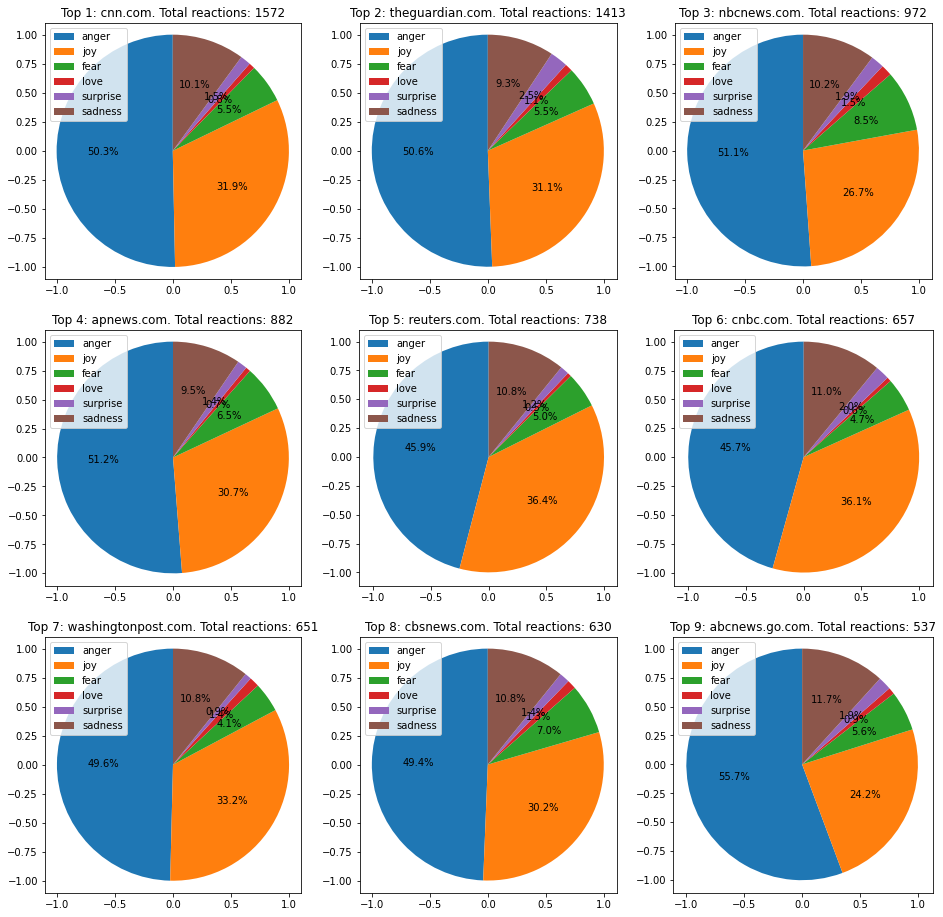

In [252]:
# Website-emotion pie plots
figure, axis = plt.subplots(3, 3, figsize=(16,16))

for i, url in enumerate(top9_url_lst):
    
    data = pie_data_url.loc[url].tolist()

    axis[i // 3, i % 3].pie(data, labels=emote_lst, startangle=90, frame=True, labeldistance=None, autopct='%1.1f%%')
    axis[i // 3, i % 3].title.set_text('Top ' + str(i + 1) + ': ' + url + '. Total reactions: ' + str(top9_url_num_lst[i] * 3))
    axis[i // 3, i % 3].legend()

plt.show() 

In [253]:
# Calculate the median of upvote_ratio to split the data evenly
dtf.upvote_ratio.median()

0.9400000000000001

In [254]:
# Prepare data for the upvote_ratio-emotion pie plots
ratio_react_df = dtf[['upvote_ratio','emote_c1','emote_c2','emote_c3']]
ratio_react_df

,upvote_ratio,emote_c1,emote_c2,emote_c3
0,0.95,anger,anger,anger
1,0.91,anger,sadness,anger
2,0.89,fear,joy,sadness
3,0.95,joy,anger,joy
4,0.94,anger,anger,anger
...,...,...,...,...
9897,0.76,anger,joy,joy
9898,0.81,anger,sadness,joy
9899,0.83,joy,anger,joy
9900,0.57,joy,anger,anger


In [255]:
# Prepare data for the upvote_ratio-emotion pie plots
upvote_ratios =['upvote_ratio >= 94%', 'upvote_ratio < 94%']
pie_data_ratio = pd.DataFrame(np.zeros((2, 6)))
pie_data_ratio = pie_data_ratio.rename(columns={0: "anger", 1: "joy", 2: "fear", 3: "love", 4: "surprise", 5: "sadness",})
pie_data_ratio = pie_data_ratio.rename(index={0: upvote_ratios[0], 1: upvote_ratios[1]})

for emotion in emote_lst:
    for comments in comment_lst:
        
        x1 = ratio_react_df[ratio_react_df.upvote_ratio >= 0.94][comments].tolist().count(emotion)
        x2 = ratio_react_df[ratio_react_df.upvote_ratio < 0.94][comments].tolist().count(emotion)
        x = np.array([x1, x2])
        y = pie_data_ratio[emotion].to_numpy()
        pie_data_ratio[emotion] = (x + y).tolist()

pie_data_ratio

,anger,joy,fear,love,surprise,sadness
upvote_ratio >= 94%,7284.0,4885.0,946.0,167.0,219.0,1424.0
upvote_ratio < 94%,7133.0,4821.0,818.0,210.0,245.0,1554.0


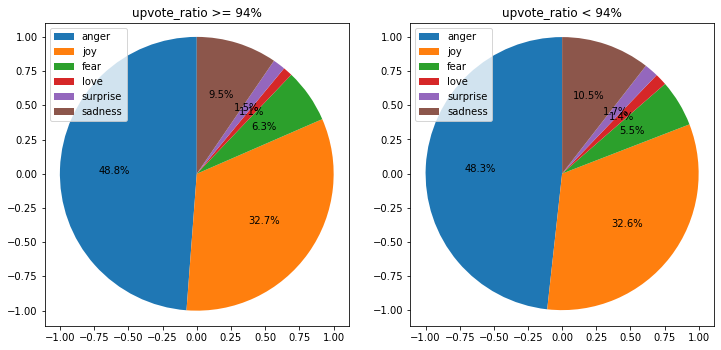

In [256]:
# Upvote_ratio-emotion pie plots
figure, axis = plt.subplots(1, 2, figsize=(12,6))

for i, u_r in enumerate(upvote_ratios):
    
    data = pie_data_ratio.loc[u_r].tolist()

    axis[i].pie(data, labels=emote_lst, startangle=90, frame=True, labeldistance=None, autopct='%1.1f%%')
    axis[i].title.set_text(u_r)
    axis[i].legend()

plt.show() 